In [86]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.animation as ani
from matplotlib import pyplot
import random
from matplotlib import lines

from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from itertools import count
import seaborn


In [87]:
def upper_columns(data):
    columns = data
    myList = []
    for name in columns:
        myList.append(name.upper())
    data.columns = myList

### Census.gov API Call

In [88]:
response = None
url1 = 'https://api.census.gov/data/timeseries/poverty/saipe?get=NAME,SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR&for=state:*'
url2 ='https://api.census.gov/data/timeseries/poverty/saipe?get=SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR&for=us'

url3 = 'https://api.census.gov/data/timeseries/poverty/saipe?get=NAME,SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR&for=county:*'

poverty_response1 = requests.get(url1)
poverty_response2 = requests.get(url2)
poverty_response3 = requests.get(url3)

Convert our api response to json

In [89]:
poverty_response_json1 = poverty_response1.json()
poverty_response_json2 = poverty_response2.json()
poverty_response_json3 = poverty_response3.json()

load Poverty Data in DF

In [90]:
poverty_state = pd.DataFrame(poverty_response_json1[1:], columns=poverty_response_json1[0])
poverty_nat = pd.DataFrame(poverty_response_json2[1:], columns=poverty_response_json2[0])
poverty_county = pd.DataFrame(poverty_response_json3[1:], columns=poverty_response_json3[0])

In [91]:
poverty_county.head(5).shape
poverty_county

,NAME,SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR,state,county
0,Autauga County,14.3,20.2,26898,1989,01,001
1,Baldwin County,13.2,18.6,24043,1989,01,003
2,Barbour County,26.2,38.2,18673,1989,01,005
3,Bibb County,18.9,25.0,19604,1989,01,007
4,Blount County,13.4,19.4,24035,1989,01,009
...,...,...,...,...,...,...,...
91108,Sweetwater County,9.2,9.7,74677,2021,56,037
91109,Teton County,5.9,5.5,102709,2021,56,039
91110,Uinta County,9.4,11.2,70162,2021,56,041
91111,Washakie County,10.2,12.5,62176,2021,56,043


In [92]:
poverty_state.head(5)

,NAME,SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR,state
0,Alabama,17.7,24.1,22202,1989,01
1,Alaska,10.6,15.4,33885,1989,02
2,Arizona,14.7,23.3,28924,1989,04
3,Arkansas,17.9,24.4,20729,1989,05
4,California,12.7,21.3,33474,1989,06


In [93]:
state_name_df = poverty_state[['NAME','state']]




In [94]:
state_name_df.rename(columns={'NAME': "STATE_NAME"}, inplace=True)

C:\Users\kendr\AppData\Local\Temp\ipykernel_20060\1187030159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_name_df.rename(columns={'NAME': "STATE_NAME"}, inplace=True)


In [95]:
state_name_df.head(5)

,STATE_NAME,state
0,Alabama,01
1,Alaska,02
2,Arizona,04
3,Arkansas,05
4,California,06


In [96]:
poverty_county_state = state_name_df.merge(poverty_county, on='state')

In [97]:
poverty_county_state.shape
poverty_county_state = poverty_county_state.drop_duplicates()

In [98]:
poverty_state = poverty_state.drop(columns='state')
poverty_nat = poverty_nat.drop(columns='us')
poverty_county_state = poverty_county_state.drop(columns='state')

poverty_county_state = poverty_county_state.drop(columns='county')

poverty_state = poverty_state.rename(columns={"NAME": "STATE", "SAEPOVRTALL_PT": "PR_ALL", "SAEPOVRT0_17_PT": "PR_YOUTH", 'SAEMHI_PT': 'MED_HH_INCOME' })
poverty_nat = poverty_nat.rename(columns={"NAME": "STATE", "SAEPOVRTALL_PT": "PR_ALL", "SAEPOVRT0_17_PT": "PR_YOUTH", 'SAEMHI_PT': 'MED_HH_INCOME' })

poverty_county_state = poverty_county_state.rename(columns={"NAME": "COUNTY", "SAEPOVRTALL_PT": "PR_ALL", "SAEPOVRT0_17_PT": "PR_YOUTH", 'SAEMHI_PT': 'MED_HH_INCOME' })

In [99]:
poverty_state = poverty_state.astype({'PR_ALL': float, 'PR_YOUTH': float, 'MED_HH_INCOME': float, 'YEAR': int})
poverty_nat = poverty_nat.astype({'PR_ALL': float, 'PR_YOUTH': float, 'MED_HH_INCOME': float, 'YEAR': int})
poverty_county_state = poverty_county_state.astype({'PR_ALL': float, 'PR_YOUTH': float, 'MED_HH_INCOME': float, 'YEAR': int})

In [100]:
print(poverty_state.dtypes)
print(poverty_nat.dtypes)
print(poverty_county_state.dtypes)

STATE             object
PR_ALL           float64
PR_YOUTH         float64
MED_HH_INCOME    float64
YEAR               int32
dtype: object
PR_ALL           float64
PR_YOUTH         float64
MED_HH_INCOME    float64
YEAR               int32
dtype: object
STATE_NAME        object
COUNTY            object
PR_ALL           float64
PR_YOUTH         float64
MED_HH_INCOME    float64
YEAR               int32
dtype: object


In [101]:
poverty_nat = poverty_nat[poverty_nat['YEAR'] >= 2017]
poverty_state = poverty_state[poverty_state['YEAR'] >= 2017]

# county_df = poverty_county_state[poverty_county_state['YEAR'] >= 2017]

In [102]:
poverty_state = poverty_state[poverty_state['STATE'] != 'Guam'] 
poverty_state = poverty_state[poverty_state['STATE'] != 'Puerto Rico'] 
poverty_state = poverty_state[poverty_state['STATE'] != 'Virgin Islands']
poverty_state = poverty_state[poverty_state['STATE'] != 'District of Columbia']

## Graphs for County Poverty

In [103]:
county_df = poverty_county_state
minnesota = county_df[county_df['STATE_NAME'] == 'Minnesota']
hennepin = minnesota[minnesota['COUNTY'] == 'Hennepin County']

In [104]:
hennepin = hennepin.drop_duplicates()

array([[<AxesSubplot:title={'center':'PR_ALL'}>,
        <AxesSubplot:title={'center':'PR_YOUTH'}>],
       [<AxesSubplot:title={'center':'MED_HH_INCOME'}>,
        <AxesSubplot:title={'center':'YEAR'}>]], dtype=object)

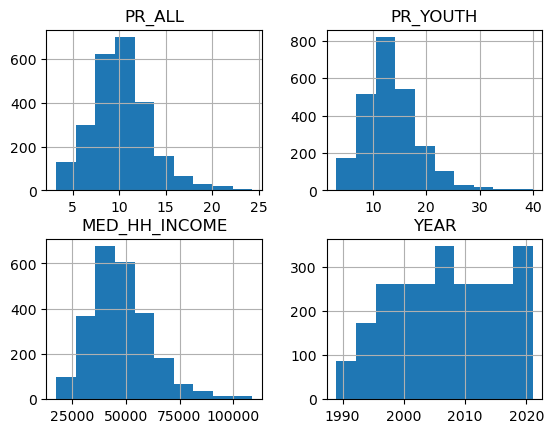

In [105]:
minnesota.hist(bins=10)

<AxesSubplot:xlabel='PR_ALL', ylabel='MED_HH_INCOME'>

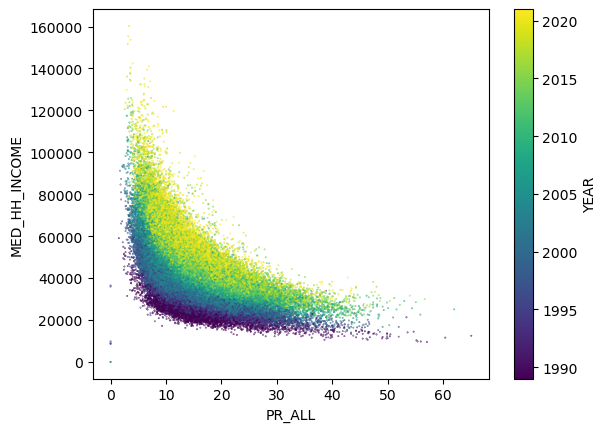

In [106]:
county_df.plot.scatter(y='MED_HH_INCOME', x='PR_ALL', c='YEAR', colormap='viridis', s=.1)


<AxesSubplot:xlabel='PR_ALL', ylabel='MED_HH_INCOME'>

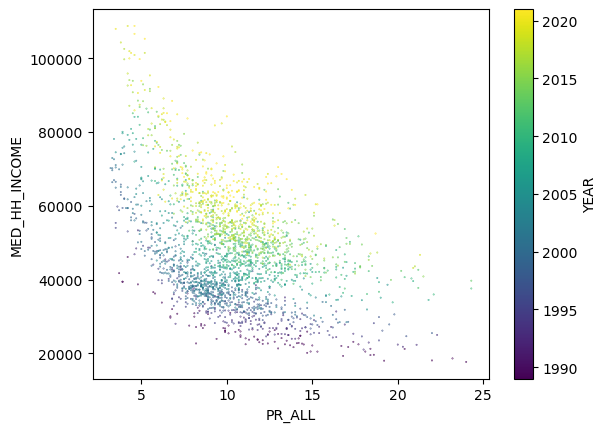

In [107]:
minnesota.plot.scatter(y='MED_HH_INCOME', x='PR_ALL', c='YEAR', colormap='viridis', s=.1)

<AxesSubplot:xlabel='YEAR', ylabel='MED_HH_INCOME'>

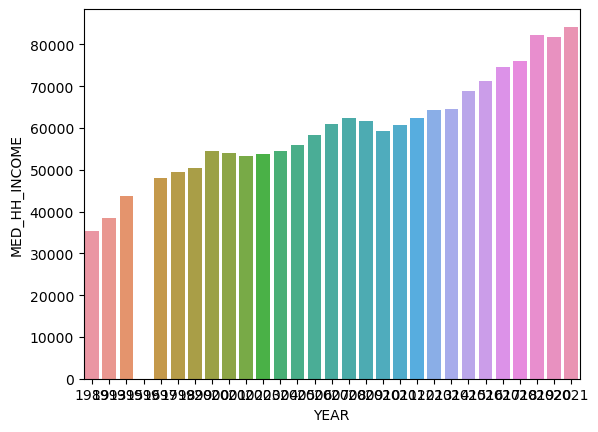

In [108]:
seaborn.barplot(x='YEAR', y='MED_HH_INCOME', data = hennepin)


<AxesSubplot:xlabel='PR_ALL', ylabel='YEAR'>

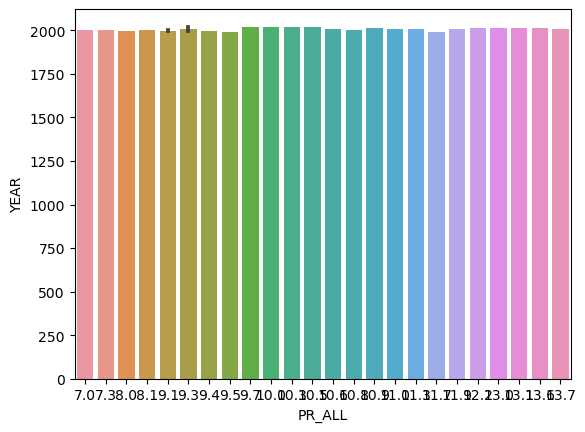

In [109]:
seaborn.barplot(y='YEAR', x='PR_ALL', data = hennepin)

In [110]:
poverty_county.columns

Index(['NAME', 'SAEPOVRTALL_PT', 'SAEPOVRT0_17_PT', 'SAEMHI_PT', 'YEAR',
       'state', 'county'],
      dtype='object')

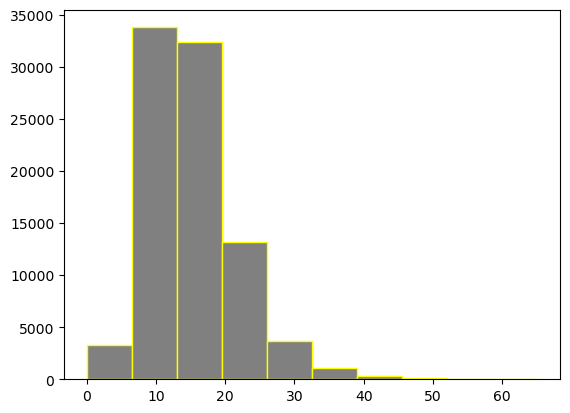

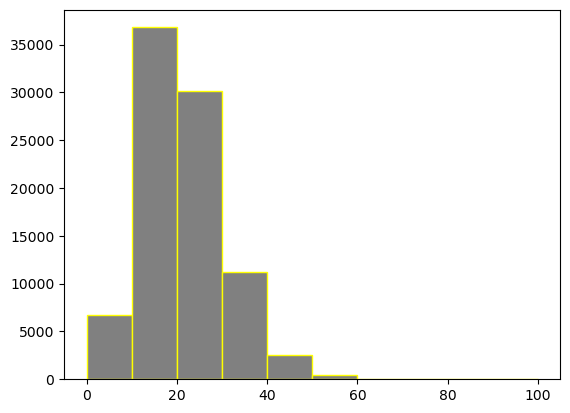

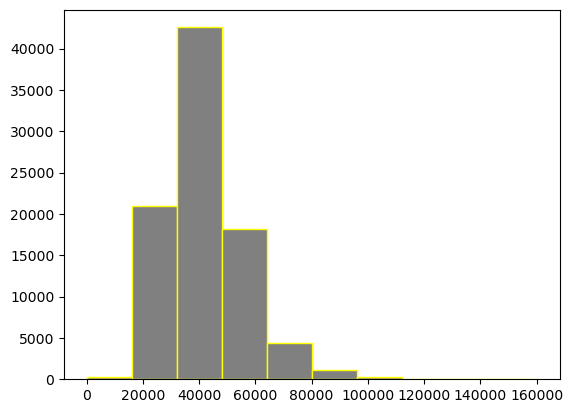

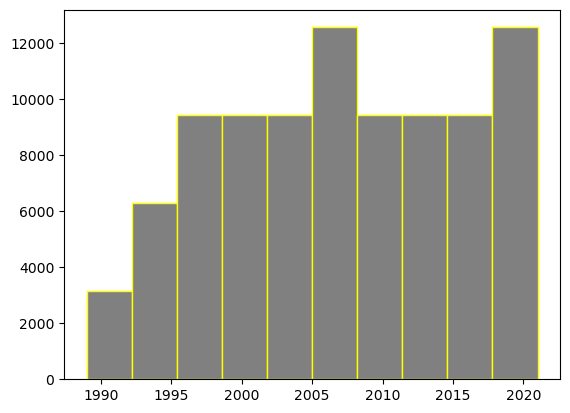

In [111]:
plt.hist(county_df['PR_ALL'], edgecolor="yellow", color="grey")
plt.show()
plt.hist(county_df['PR_YOUTH'], edgecolor="yellow", color="grey")
plt.show()
plt.hist(county_df['MED_HH_INCOME'], edgecolor="yellow", color="grey")
plt.show()
plt.hist(county_df['YEAR'], edgecolor="yellow", color="grey")
plt.show()

In [112]:
poverty_county

,NAME,SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR,state,county
0,Autauga County,14.3,20.2,26898,1989,01,001
1,Baldwin County,13.2,18.6,24043,1989,01,003
2,Barbour County,26.2,38.2,18673,1989,01,005
3,Bibb County,18.9,25.0,19604,1989,01,007
4,Blount County,13.4,19.4,24035,1989,01,009
...,...,...,...,...,...,...,...
91108,Sweetwater County,9.2,9.7,74677,2021,56,037
91109,Teton County,5.9,5.5,102709,2021,56,039
91110,Uinta County,9.4,11.2,70162,2021,56,041
91111,Washakie County,10.2,12.5,62176,2021,56,043


5 Highest Poverty levels by county

In [113]:
county_df = county_df.drop_duplicates()

In [114]:
county_df.nlargest(10,'PR_ALL')

,STATE_NAME,COUNTY,PR_ALL,PR_YOUTH,MED_HH_INCOME,YEAR
1985482,South Dakota,Shannon County,65.1,98.9,12501.0,1989
1986548,South Dakota,Ziebach County,62.0,76.7,25084.0,2009
934919,Louisiana,East Carroll Parish,60.4,88.9,11578.0,1989
1177135,Mississippi,Holmes County,57.1,75.6,9500.0,1989
1987076,South Dakota,Ziebach County,56.7,74.7,29985.0,2017
1177181,Mississippi,Tunica County,56.0,65.1,9749.0,1989
1986416,South Dakota,Ziebach County,55.9,66.6,22602.0,2007
834076,Kentucky,Owsley County,55.4,99.9,9782.0,1989
2121041,Texas,Starr County,55.2,67.5,10314.0,1989
1986802,South Dakota,Shannon County,55.1,53.4,28512.0,2013


In [115]:
uscounties_df = pd.read_csv("../data/uscounties.csv")

In [116]:
upper_columns(uscounties_df)

In [117]:
uscounties_df.head(5)

,COUNTY,COUNTY_ASCII,COUNTY_FULL,COUNTY_FIPS,STATE_ID,STATE_NAME,LAT,LNG,POPULATION
0,Los Angeles,Los Angeles,Los Angeles County,6037,CA,California,34.3209,-118.2247,10019635
1,Cook,Cook,Cook County,17031,IL,Illinois,41.8401,-87.8168,5265398
2,Harris,Harris,Harris County,48201,TX,Texas,29.8577,-95.3936,4697957
3,Maricopa,Maricopa,Maricopa County,4013,AZ,Arizona,33.3490,-112.4915,4367186
4,San Diego,San Diego,San Diego County,6073,CA,California,33.0343,-116.7350,3296317


In [118]:
county_df.head(5)

,STATE_NAME,COUNTY,PR_ALL,PR_YOUTH,MED_HH_INCOME,YEAR
0,Alabama,Autauga County,14.3,20.2,26898.0,1989
1,Alabama,Baldwin County,13.2,18.6,24043.0,1989
2,Alabama,Barbour County,26.2,38.2,18673.0,1989
3,Alabama,Bibb County,18.9,25.0,19604.0,1989
4,Alabama,Blount County,13.4,19.4,24035.0,1989


In [119]:
county_locs_df = county_df.merge(uscounties_df, how='left', left_on=['STATE_NAME', 'COUNTY'], right_on=['STATE_NAME', 'COUNTY_FULL'])

In [120]:
county_locs_df.head(3)

,STATE_NAME,COUNTY_x,PR_ALL,PR_YOUTH,MED_HH_INCOME,YEAR,COUNTY_y,COUNTY_ASCII,COUNTY_FULL,COUNTY_FIPS,STATE_ID,LAT,LNG,POPULATION
0,Alabama,Autauga County,14.3,20.2,26898.0,1989,Autauga,Autauga,Autauga County,1001.0,AL,32.5349,-86.6427,58239.0
1,Alabama,Baldwin County,13.2,18.6,24043.0,1989,Baldwin,Baldwin,Baldwin County,1003.0,AL,30.7276,-87.7226,227131.0
2,Alabama,Barbour County,26.2,38.2,18673.0,1989,Barbour,Barbour,Barbour County,1005.0,AL,31.8696,-85.3932,25259.0


In [121]:
county_final = county_locs_df[['STATE_NAME','YEAR','PR_ALL','PR_YOUTH','MED_HH_INCOME','COUNTY_FULL','LAT','LNG','POPULATION']]

Remove population data from all year except 2020

In [122]:
for i in range(len(county_final)):
    if county_final.loc[i, "YEAR"] != 2020:
        county_final.loc[i,'POPULATION'] = None

In [123]:
county_final.head()

,STATE_NAME,YEAR,PR_ALL,PR_YOUTH,MED_HH_INCOME,COUNTY_FULL,LAT,LNG,POPULATION
0,Alabama,1989,14.3,20.2,26898.0,Autauga County,32.5349,-86.6427,NaN
1,Alabama,1989,13.2,18.6,24043.0,Baldwin County,30.7276,-87.7226,NaN
2,Alabama,1989,26.2,38.2,18673.0,Barbour County,31.8696,-85.3932,NaN
3,Alabama,1989,18.9,25.0,19604.0,Bibb County,32.9986,-87.1265,NaN
4,Alabama,1989,13.4,19.4,24035.0,Blount County,33.9809,-86.5674,NaN


In [124]:
import matplotlib
import numpy as np
np.random.seed(seed=30)

cmap = matplotlib.cm.get_cmap('Spectral') # Getting a list of color values.

In [125]:
color_dict = pd.Series({k:cmap(np.random.rand()) for k in county_final['PR_ALL'].unique()})
color_dict.name = 'color_dict'

county_final = pd.merge(county_final, color_dict, how='left', left_on='PR_ALL', right_index=True)

In [126]:
lowest10 = county_final.nsmallest(10,'PR_ALL')

<AxesSubplot:title={'center':'Poverty Rates vs Median Income by County'}, xlabel='Longitude', ylabel='Latitude'>

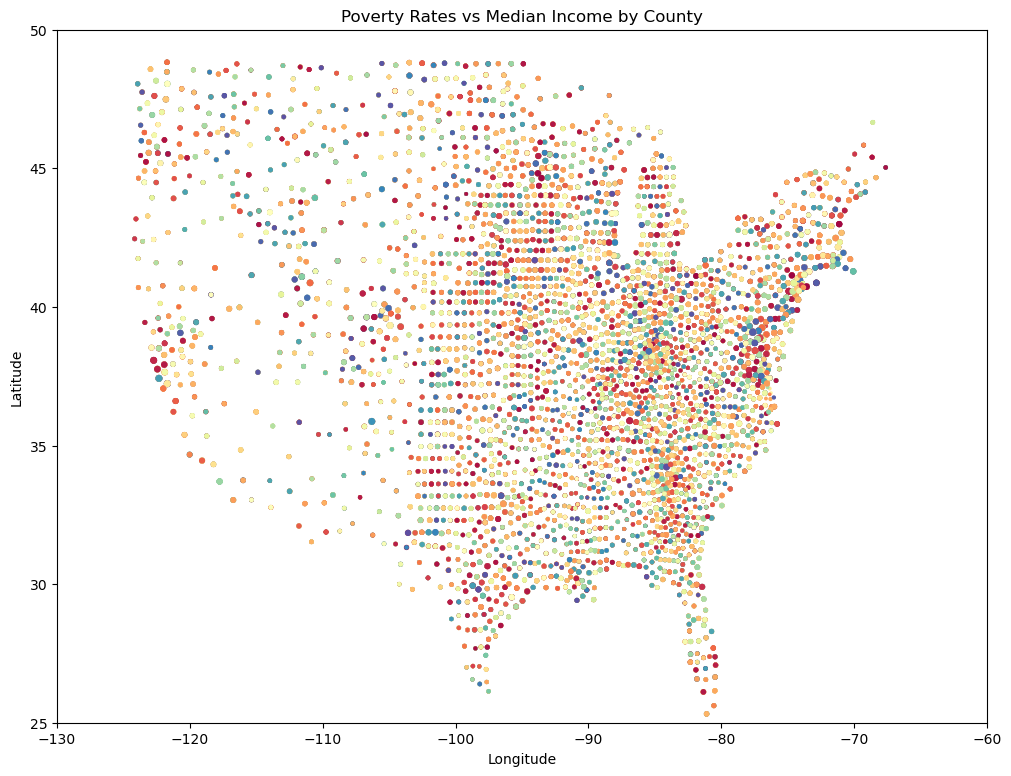

In [127]:



county_final.plot.scatter(x='LNG', y='LAT', ylim=(25,50), xlim=(-130,-60),s=(county_final['MED_HH_INCOME']/8000),c=county_final['color_dict'],figsize=(12,9),title="Poverty Rates vs Median Income by County", xlabel='Longitude',ylabel='Latitude')

In [129]:
county_final.to_csv('../output/county_poverty.csv')